In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
#Definición de la función de interés
def f(x,t,omega):
    return -(omega**2)*x

def System(r,t,omega=2*np.pi):
    x,v = r
    dxdt = v
    dvdt = -omega**2*x
    return dxdt,dvdt


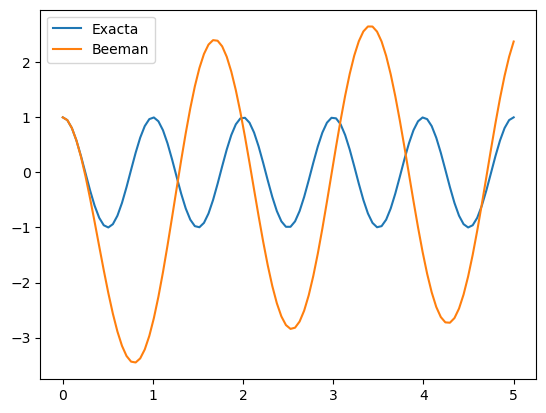

In [14]:
def Beeman(f,x0,t,omega):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    x[0] = x0[0]
    v[0] = x0[1]
    #LEAPFROG para inicializar Beeman
    a0 = f(x[0],t[0],omega)
    vhalf = v[0] + 0.5*h*a0
    x[1] = x[0] + h*vhalf
    a1 = f(x[1],t,omega)
    v[1] = vhalf + 0.5*h*a1
    
    xc = x.copy()
    vc = v.copy()
    
    for i in range(2,len(t)):
        
        an = f(x[i-1],t[i-1],omega)
        anm = f(x[i-2],t[i-2],omega)
        x[i] = x[i-1] + h*v[i-1] + ((h**2)/6) * (4*an - anm)
        #future correction
        xc[i] = x[i]
        xc[i] = xc[i-1] + h*vc[i-1] + ((h**2)/6) * (f(xc[i],t[i],omega) + 2*an)
        vc[i] = (xc[i]/h) - (xc[i-1]/h) + ((h)/6) * (2*f(xc[i],t[i],omega) + an)
        
    return x,v,xc,vc

omega = 2*np.pi

t = np.linspace(0,5,100)
x0 = np.array([1,0])
x,v,xc,vc= Beeman(f,x0,t,omega)
exac = odeint(System,x0,t,args=(omega,))

plt.plot(t,exac[:,0],label='Exacta')
plt.plot(t,xc,label='Beeman')
plt.legend()
plt.show()